In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train=pd.read_csv('data/house_price_train.csv')
df_train.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1216,1217,90,RM,68.0,8930,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,112000
455,456,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2007,WD,Normal,175500
423,424,60,RL,80.0,9200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,315000
836,837,30,RM,90.0,8100,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,6,2007,COD,Normal,153500
422,423,20,RL,100.0,21750,Pave,NaN,Reg,HLS,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,113000


In [3]:
print(df_train.shape)
print(df_train.columns)
df_train.dtypes

(1460, 81)
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [4]:
df_train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

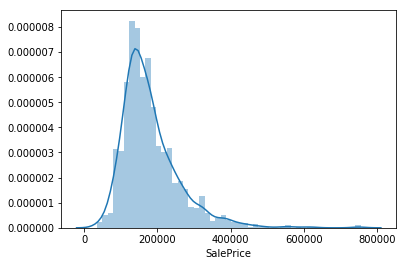

In [5]:
sns.distplot(df_train.SalePrice)

In [6]:
print(df_train.SalePrice.skew(), df_train.SalePrice.kurtosis())

1.88287575977 6.53628186006


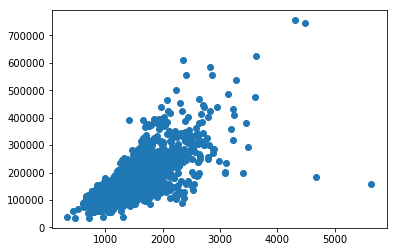

In [7]:
plt.scatter(df_train.GrLivArea, df_train.SalePrice)

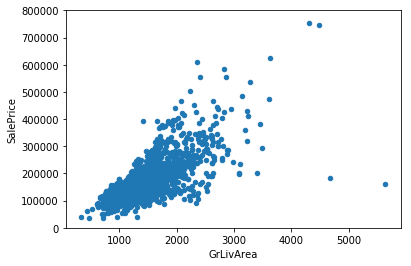

In [8]:
df_train.plot.scatter("GrLivArea", 'SalePrice', ylim=(0,800000))

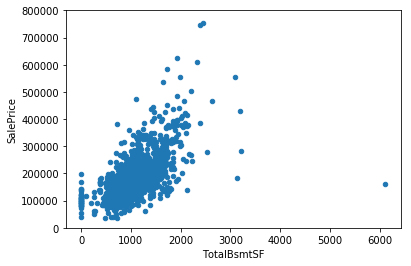

In [9]:
df_train.plot.scatter('TotalBsmtSF','SalePrice', ylim=(0,800000))

(0, 800000)

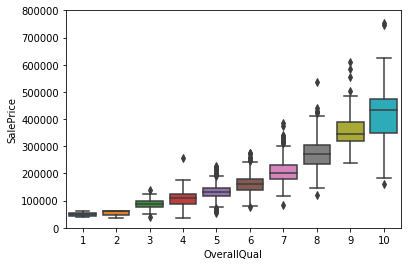

In [10]:
sns.boxplot(df_train.OverallQual, df_train.SalePrice)
plt.ylim([0,800000])

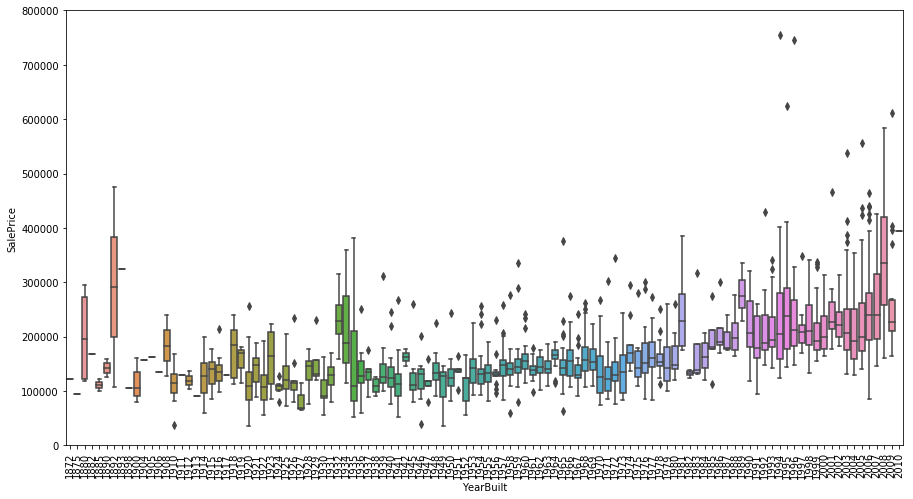

In [11]:
plt.figure(figsize=(15,8))
sns.boxplot(df_train.YearBuilt, df_train.SalePrice)
plt.ylim([0,800000])
plt.xticks(rotation=90)
plt.show()

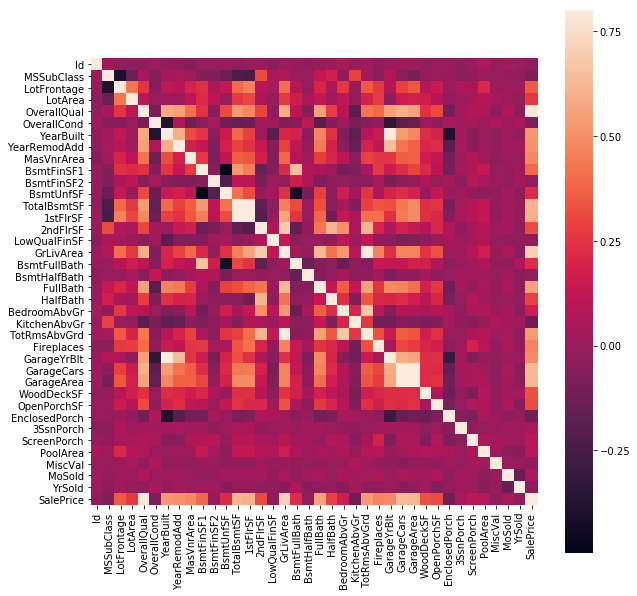

In [12]:
corre=df_train.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corre, square=True, vmax=0.8)

In [13]:
corre.nlargest(10,'SalePrice')

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
SalePrice,-0.021917,-0.084284,0.351799,0.263843,0.790982,-0.077856,0.522897,0.507101,0.477493,0.386420,...,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.021190,0.046432,-0.028923,1.000000
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
GrLivArea,0.008273,0.074853,0.402797,0.263116,0.593007,-0.079686,0.199010,0.287389,0.390857,0.208171,...,0.247433,0.330224,0.009113,0.020643,0.101510,0.170205,-0.002416,0.050240,-0.036526,0.708624
GarageCars,0.016570,-0.040110,0.285691,0.154871,0.600671,-0.185758,0.537850,0.420622,0.364204,0.224054,...,0.226342,0.213569,-0.151434,0.035765,0.050494,0.020934,-0.043080,0.040522,-0.039117,0.640409
GarageArea,0.017634,-0.098672,0.344997,0.180403,0.562022,-0.151521,0.478954,0.371600,0.373066,0.296970,...,0.224666,0.241435,-0.121777,0.035087,0.051412,0.061047,-0.027400,0.027974,-0.027378,0.623431
TotalBsmtSF,-0.015415,-0.238518,0.392075,0.260833,0.537808,-0.171098,0.391452,0.291066,0.363936,0.522396,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581
1stFlrSF,0.010496,-0.251758,0.457181,0.299475,0.476224,-0.144203,0.281986,0.240379,0.344501,0.445863,...,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.013604,0.605852
FullBath,0.005587,0.131608,0.198769,0.126031,0.550600,-0.194149,0.468271,0.439046,0.276833,0.058543,...,0.187703,0.259977,-0.115093,0.035353,-0.008106,0.049604,-0.014290,0.055872,-0.019669,0.560664
TotRmsAbvGrd,0.027239,0.040380,0.352096,0.190015,0.427452,-0.057583,0.095589,0.191740,0.280682,0.044316,...,0.165984,0.234192,0.004151,-0.006683,0.059383,0.083757,0.024763,0.036907,-0.034516,0.533723
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897


In [14]:
corre.nlargest(10, 'SalePrice')['SalePrice']

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

In [16]:
corre.nlargest(10, 'SalePrice')['SalePrice'].index

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

In [17]:
cols=corre.nlargest(10, 'SalePrice')['SalePrice'].index
cm=df_train[cols].corr()

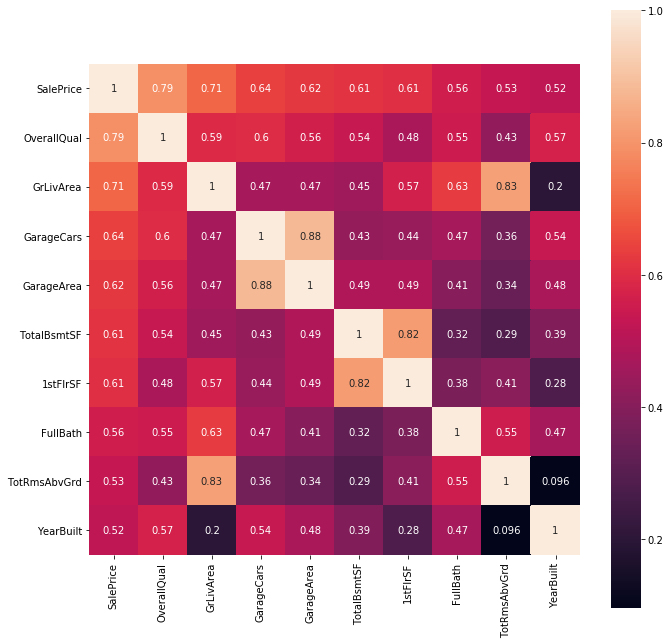

In [18]:
plt.figure(figsize=(11,11))
sns.heatmap(cm, square=True, annot=True, cbar=True)
plt.show()

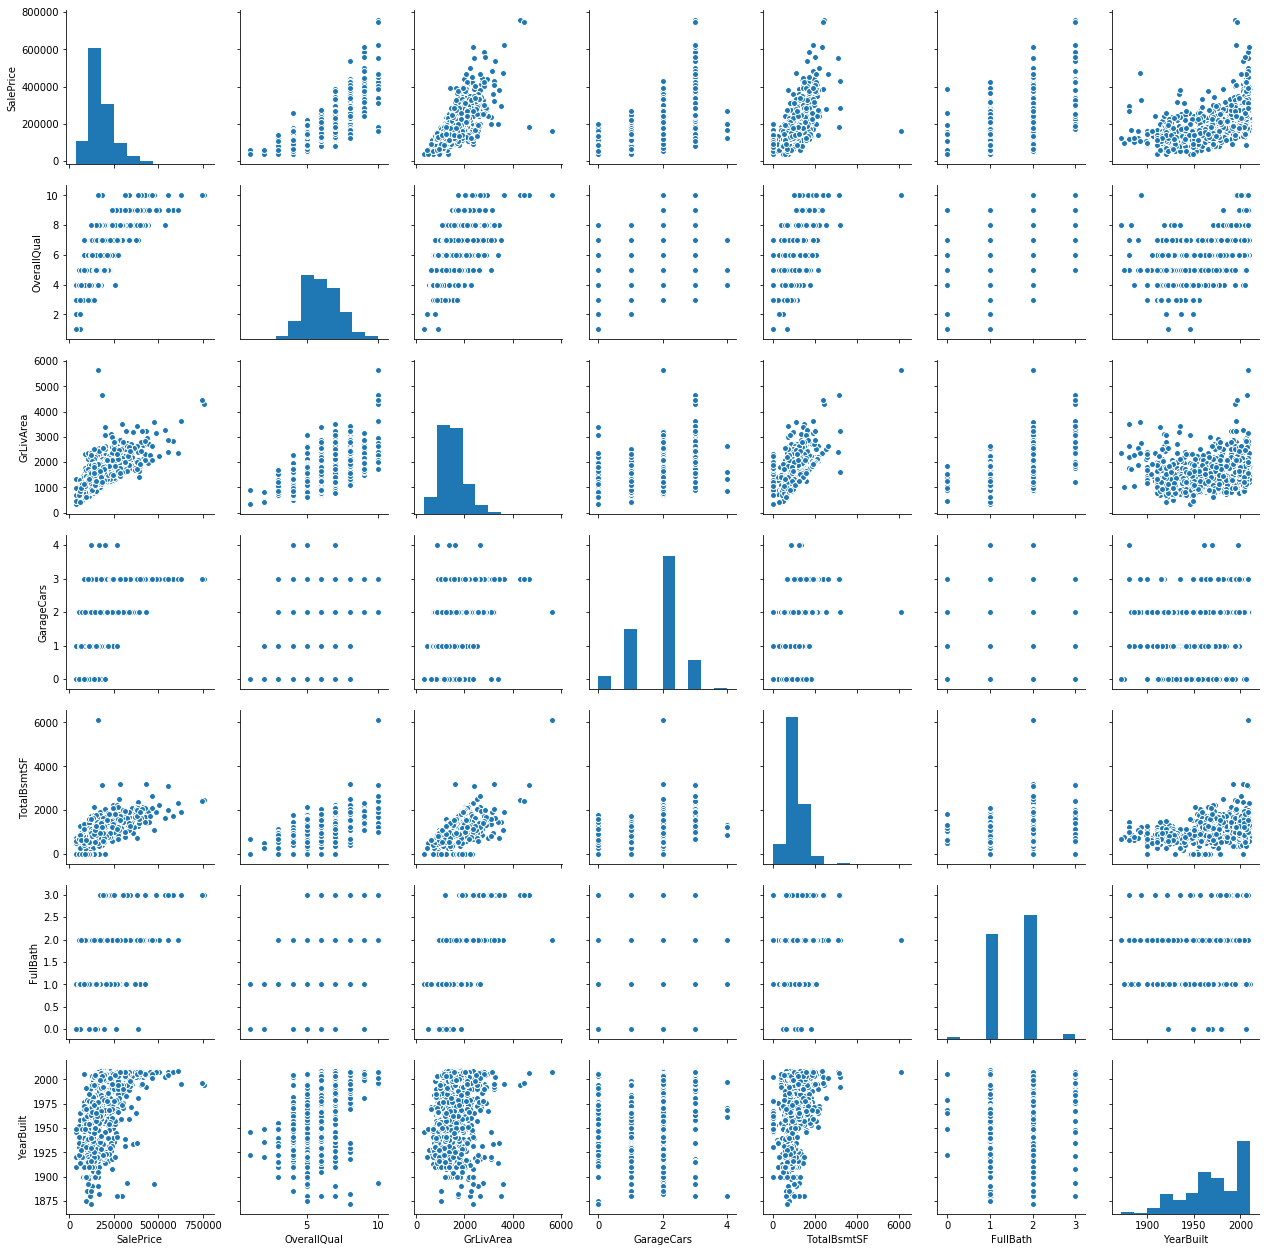

In [19]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size=2.5)
plt.show()

In [20]:
total=df_train.isnull().sum().sort_values(ascending=False)
percent=total/df_train.shape[0]
missing_data=pd.concat([total, percent],axis=1, keys=['Total','Percent'])
missing_data.head()

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603


In [21]:
missing_data[missing_data.Total>1].index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageCond', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual',
       'MasVnrArea', 'MasVnrType'],
      dtype='object')

In [22]:
df_train=df_train.drop(missing_data[missing_data.Total>0].index, axis=1)

In [23]:
df_train.isnull().sum().max()

0

In [24]:
from sklearn.preprocessing import StandardScaler
sale_std=StandardScaler().fit_transform(df_train.SalePrice.values.reshape(-1,1))

In [25]:
sorted(sale_std)[:10]

[array([-1.83870376]),
 array([-1.83352844]),
 array([-1.80092766]),
 array([-1.78329881]),
 array([-1.77448439]),
 array([-1.62337999]),
 array([-1.61708398]),
 array([-1.58560389]),
 array([-1.58560389]),
 array([-1.5731])]

In [26]:
sorted(sale_std)[-10:]

[array([ 3.82897043]),
 array([ 4.04098249]),
 array([ 4.49634819]),
 array([ 4.71041276]),
 array([ 4.73032076]),
 array([ 5.06214602]),
 array([ 5.42383959]),
 array([ 5.59185509]),
 array([ 7.10289909]),
 array([ 7.22881942])]

In [27]:
sorted(sale_std[:,0])[:10]

[-1.8387037612340333,
 -1.833528435547519,
 -1.8009276613324687,
 -1.7832988147117386,
 -1.7744843914013735,
 -1.6233799917951151,
 -1.6170839751448542,
 -1.5856038918935504,
 -1.5856038918935504,
 -1.5731000028261326]

In [28]:
np.ndim(sale_std)

2

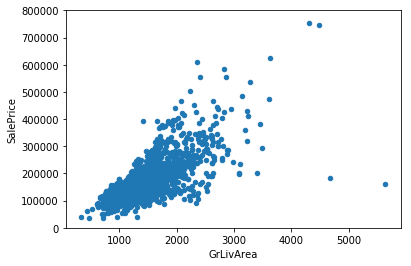

In [29]:
df_train.plot.scatter('GrLivArea','SalePrice', ylim=(0,800000))

In [30]:
df_train.sort_values(by='GrLivArea', ascending=False)[:2]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750


In [31]:
df_train[df_train.Id==1299].index

Int64Index([1298], dtype='int64')

In [32]:
df_train=df_train.drop(df_train[df_train.Id==1299].index)
df_train=df_train.drop(df_train[df_train.Id==524].index)

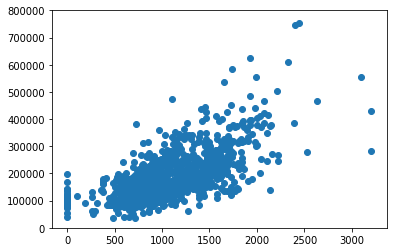

In [33]:
plt.scatter(df_train.TotalBsmtSF, df_train.SalePrice)
plt.ylim([0,800000])
plt.show()

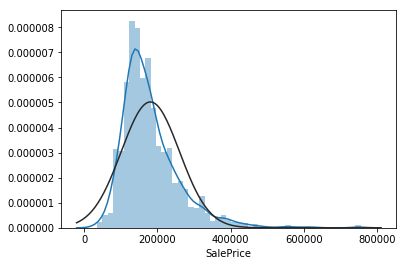

In [34]:
from scipy.stats import norm
sns.distplot(df_train.SalePrice, fit=norm)

In [35]:
from scipy import stats


((array([-3.3047554 , -3.04752042, -2.90446807, ...,  2.90446807,
          3.04752042,  3.3047554 ]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000])),
 (74213.259599766257, 180932.91906721535, 0.93201544928923663))

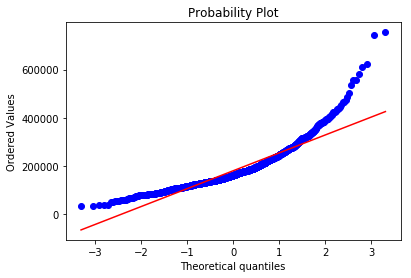

In [36]:
stats.probplot(df_train.SalePrice, plot=plt)

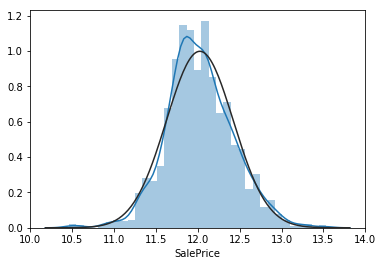

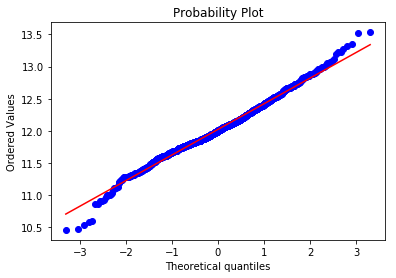

In [37]:
df_train.SalePrice=np.log(df_train.SalePrice)
sns.distplot(df_train.SalePrice, fit=norm)
plt.figure()
stats.probplot(df_train.SalePrice, plot=plt)
plt.show()

In [38]:
def draw_plot(col):
    sns.distplot(df_train[col], fit=norm)
    plt.figure()
    stats.probplot(df_train[col], plot=plt)
    plt.show()


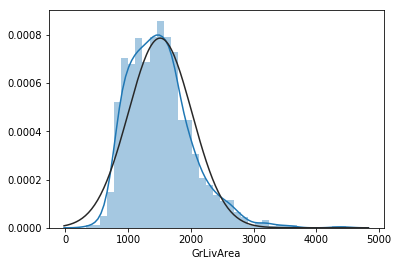

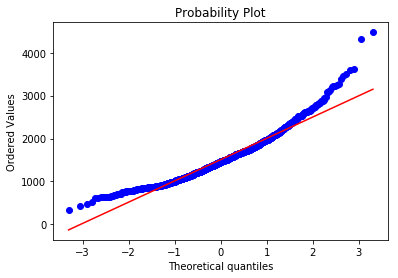

In [39]:
draw_plot('GrLivArea')

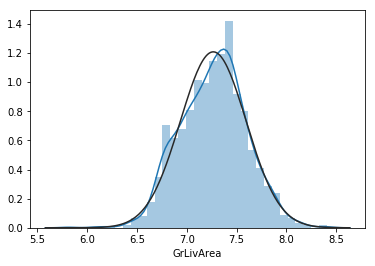

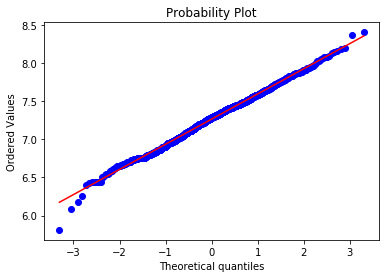

In [89]:
df_train.GrLivArea=np.log(df_train.GrLivArea)
draw_plot('GrLivArea')

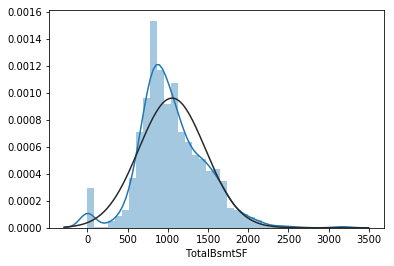

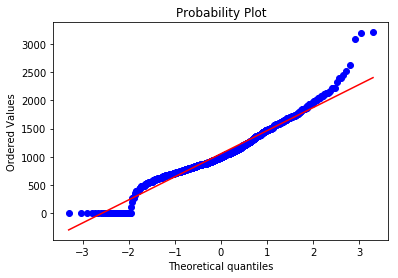

In [90]:
draw_plot('TotalBsmtSF')

In [91]:
df_train.TotalBsmtSF.value_counts()

0       37
864     35
672     17
912     15
1040    14
816     13
728     12
768     12
780     11
894     11
848     11
832     10
952      9
630      9
756      9
1056     8
936      8
483      7
720      7
384      7
1008     7
600      7
840      7
858      6
884      6
876      6
1362     6
1392     6
796      6
928      5
        ..
1202     1
1203     1
1205     1
1210     1
1215     1
1218     1
1219     1
1221     1
1223     1
1224     1
1225     1
1226     1
1235     1
1241     1
1242     1
1244     1
1246     1
1247     1
1251     1
1253     1
1257     1
1260     1
1261     1
1266     1
1267     1
1269     1
1271     1
1272     1
1273     1
1098     1
Name: TotalBsmtSF, Length: 719, dtype: int64

In [92]:
df_train['hasBsmt']=0
df_train['hasBsmt'][df_train.TotalBsmtSF>0]=1
df_train.hasBsmt

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      0
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
1430    1
1431    1
1432    1
1433    1
1434    1
1435    1
1436    1
1437    1
1438    1
1439    1
1440    1
1441    1
1442    1
1443    1
1444    1
1445    1
1446    1
1447    1
1448    1
1449    1
1450    1
1451    1
1452    1
1453    1
1454    1
1455    1
1456    1
1457    1
1458    1
1459    1
Name: hasBsmt, Length: 1458, dtype: int64

In [93]:
df_train.TotalBsmtSF[df_train.hasBsmt>0]=np.log(df_train.TotalBsmtSF)

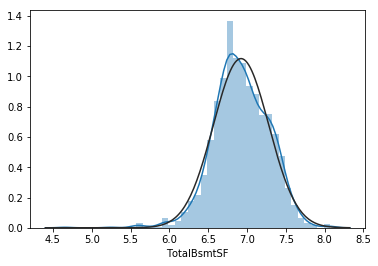

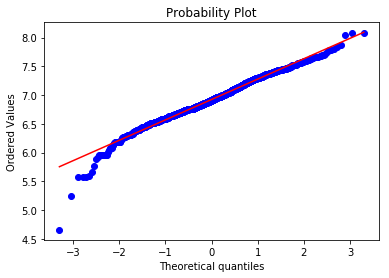

In [94]:
sns.distplot(df_train.TotalBsmtSF[df_train.hasBsmt>0],fit=norm)
plt.figure()
stats.probplot(df_train.TotalBsmtSF[df_train.hasBsmt>0],plot=plt)
plt.show()

In [96]:
pd.get_dummies(df_train).columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=217)

In [97]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice', 'hasBsmt'],
      dtype='object')